Another kind of question which quite similar to this one is multilabel, multiclass classification, which means one's can be labeled several times.

In [1]:
from keras.datasets import reuters
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(len(train_data), len(train_labels) , len(test_data), len(test_labels))

8982 8982 2246 2246


In [4]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
# vectorize the train data
def vectorize_sequences(sequences, dimension=10000):
    res = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        res[i, sequence] = 1.
    return res

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# use one-hot coding style to encode the trains

# we can define our own funciton
def to_one_hot(labels, dimension=46):
    res = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        res[i, label] = 1.
    return res

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
print(one_hot_train_labels.shape, one_hot_test_labels.shape)

(8982, 46) (2246, 46)


In [ ]:
# or we can use the build in function in keras
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_train_labels.shape, one_hot_test_labels.shape)

(8982, 46) (2246, 46)


one-hot is a group of bits among which the legal combinations of values are only those with a single high '1' bit and all the others low '0'. A similar implementation in which all bits are '1' except one '0' is sometimes called one-cold. 

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))

# use softmax to make the output become a probability (which sum is 1) among the 46 nodes
# softmax function will make the data more distinguishalbe to each other
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
# instead of using binary_crossentropy since we are now processing a more than two categories dataset
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
# split out the validation dataset
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=128,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 304us/step - loss: 1.8262 - acc: 0.6027 - val_loss: 1.2679 - val_acc: 0.7230
Epoch 2/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.9992 - acc: 0.7803 - val_loss: 1.0263 - val_acc: 0.7840
Epoch 3/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.6771 - acc: 0.8497 - val_loss: 0.9579 - val_acc: 0.7950
Epoch 4/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.4683 - acc: 0.8964 - val_loss: 0.8820 - val_acc: 0.8140
Epoch 5/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.3322 - acc: 0.9253 - val_loss: 0.8691 - val_acc: 0.8230
Epoch 6/20
7982/7982 [==============================] - 1s 164us/step - loss: 0.2584 - acc: 0.9400 - val_loss: 0.9509 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.2108 - acc: 0.9481 - val_loss: 0.9496 - val_acc: 0.8260


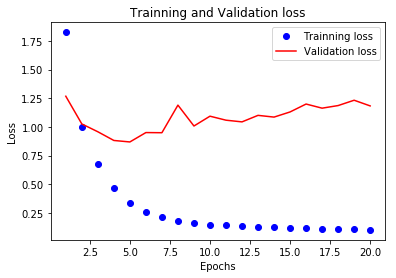

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Trainning loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Trainning and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

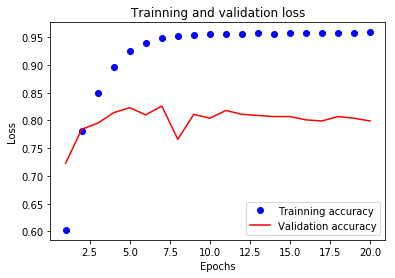

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.clf()
plt.plot(epochs, acc, 'bo', label='Trainning accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Trainning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Overfitting around 7 epochs

In [ ]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=7,
         batch_size=128,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 2s 248us/step - loss: 1.8006 - acc: 0.6233 - val_loss: 1.2325 - val_acc: 0.7240
Epoch 2/7
7982/7982 [==============================] - 1s 157us/step - loss: 0.9551 - acc: 0.7883 - val_loss: 0.9982 - val_acc: 0.7910
Epoch 3/7
7982/7982 [==============================] - 1s 151us/step - loss: 0.6456 - acc: 0.8573 - val_loss: 0.9574 - val_acc: 0.8010
Epoch 4/7
7982/7982 [==============================] - 1s 166us/step - loss: 0.4481 - acc: 0.9043 - val_loss: 0.9287 - val_acc: 0.7980
Epoch 5/7
7982/7982 [==============================] - 1s 154us/step - loss: 0.3245 - acc: 0.9308 - val_loss: 0.8704 - val_acc: 0.8320
Epoch 6/7
7982/7982 [==============================] - 1s 148us/step - loss: 0.2501 - acc: 0.9415 - val_loss: 0.9339 - val_acc: 0.8100
Epoch 7/7
  32/2246 [..............................] - ETA: 0s

In [ ]:
# my own improvement test
model = models.Sequential()

model.add(layers.Dense(500, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(500,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=3,
         batch_size=32,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

another way to process the labels is turn them to integar tensor

```python
y_train = np.array(train_labels)
y_test = np.array(test_labels)
```

And we need some ajustment to fit this change in labels. The loss function becomes **sparse_catagorical_crossentropy** ,which is mathematically identical to categorical_crossentropy, but this time it take int tensor

```python
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
```

## Summary
- N class classfication, the output layer should be N Dense layer, using softmax as activation function.
- cross entropy always a good choice for this kind of question
- there are two ways to deal with the labels
    - use one-hot encode, and use *categorical_crossentropy* as loss funciton
    - make them as int tensor, and use *sparse_categorical_crossentropy* as loss funciton
- avoid using extremely samll hidden layer